In [1]:
from pygem import IDW
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from photutils.utils import ShepardIDWInterpolator as idw

In [2]:
# synthetic example
def f(x, y):
    return -np.exp(-(y-np.sin(x))**2)

In [3]:
# create ground truth grid
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

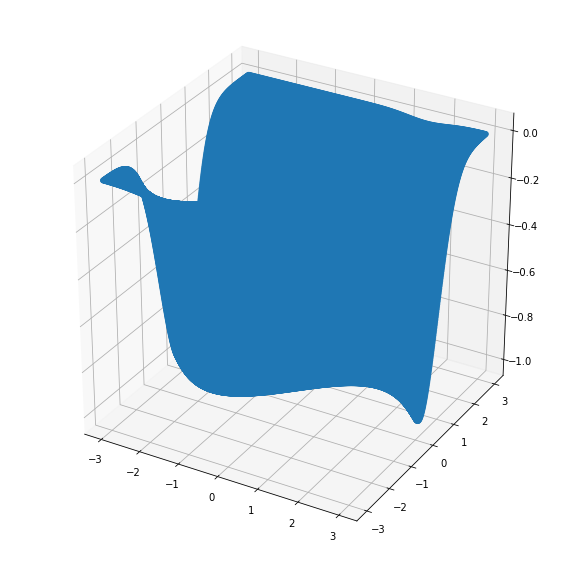

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, zs=Z)
plt.show()

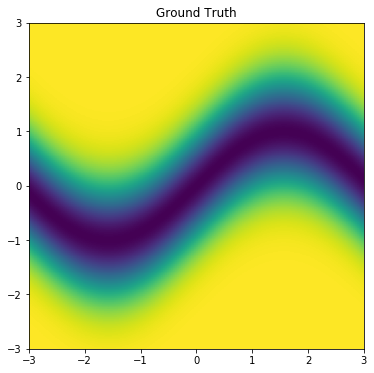

In [5]:
# color mesh map for ground truth
plt.figure(figsize=(6,6))
plt.pcolormesh(X, Y, Z, shading='auto')
plt.title('Ground Truth')
plt.show()

In [58]:
X.shape

(500, 500)

In [15]:
allx = np.linspace(-3, 3, 100)
print(allx)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [18]:
# sample data 
n = 100 
sample_x = x[np.random.choice(len(x), size=n, replace=False)]
sample_y = y[np.random.choice(len(y), size=n, replace=False)]
sample_z = f(sample_x, sample_y)

# inverse weighted distance interpolation
pos = np.vstack((sample_x, sample_y)).T
f_predict = idw(pos, sample_z)

In [70]:
inputx = np.linspace(-3, 3, 500)
inputy = np.linspace(-3, 3, 500)
# meshgrid = np.vstack((inputx, inputy)).T
# z_predict = f_predict(meshgrid)
# Z2 = np.meshgrid(z_predict)
# print(Z2)

In [66]:
X1, Y1 = np.meshgrid(inputx, inputy)
Z1 = []
for i in range(len(X1)):
    xrow = X1[i]
    yrow = Y1[i]
    row_grid = np.vstack((xrow, yrow)).T
    z_row = f_predict(row_grid)
    Z1.append(z_row)
Z1

[array([-4.68339248e-02, -4.64801860e-02, -4.61216097e-02, -4.57581064e-02,
        -4.53896128e-02, -4.50161007e-02, -4.46375870e-02, -4.42541460e-02,
        -4.38659238e-02, -4.34731555e-02, -4.30761851e-02, -4.26754888e-02,
        -4.22717013e-02, -4.18656456e-02, -4.14583662e-02, -4.10511641e-02,
        -2.57018214e-02, -2.55353206e-02, -2.53716403e-02, -2.52123739e-02,
        -2.50593705e-02, -2.49147356e-02, -2.47808158e-02, -2.46601640e-02,
        -2.45554805e-02, -2.44695284e-02, -2.44050249e-02, -2.43645130e-02,
        -2.43502252e-02, -2.43639523e-02, -2.44069347e-02, -2.44797911e-02,
        -2.45824958e-02, -2.47144075e-02, -2.48743461e-02, -2.50607032e-02,
        -2.52715727e-02, -2.55048823e-02, -2.57585130e-02, -2.60303956e-02,
        -2.63185814e-02, -2.66212854e-02, -2.69369064e-02, -2.72640279e-02,
        -2.76014071e-02, -2.79479549e-02, -2.83027134e-02, -2.86648326e-02,
        -2.90335484e-02, -2.94081644e-02, -2.97880366e-02, -3.01725612e-02,
        -3.0

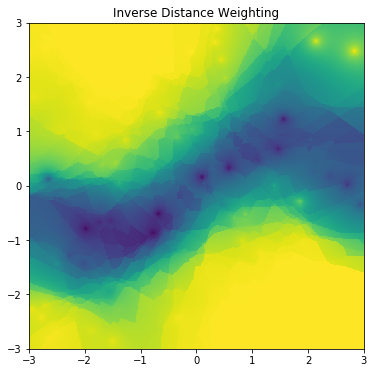

In [69]:
# color mesh map for ground truth
plt.figure(figsize=(6,6))
plt.pcolormesh(X1, Y1, Z1, shading='auto')
plt.title('Inverse Distance Weighting')
plt.show()

In [72]:
# error
err = np.linalg.norm(np.abs(np.subtract(Z1, Z)))
print(err)

62.13816344339125


In [73]:
def run_IDW(n):
    sample_x = x[np.random.choice(len(x), size=n, replace=False)]
    sample_y = y[np.random.choice(len(y), size=n, replace=False)]
    sample_z = f(sample_x, sample_y)
    pos = np.vstack((sample_x, sample_y)).T
    f_predict = idw(pos, sample_z)
    inputx = np.linspace(-3, 3, 500)
    inputy = np.linspace(-3, 3, 500)
    X1, Y1 = np.meshgrid(inputx, inputy)
    Z1 = []
    for i in range(len(X1)):
        xrow = X1[i]
        yrow = Y1[i]
        row_grid = np.vstack((xrow, yrow)).T
        z_row = f_predict(row_grid)
        Z1.append(z_row)
    return Z1

def calculate_err(Z_predict):
    return np.linalg.norm(np.abs(np.subtract(Z, Z_predict)))

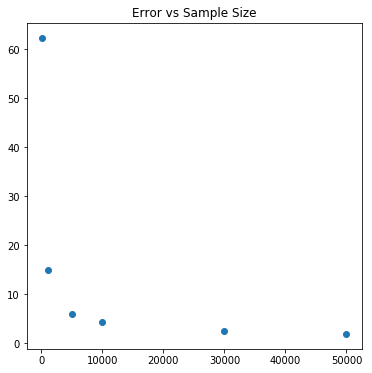

In [78]:
x = np.linspace(-3, 3, 50000)
y = np.linspace(-3, 3, 50000)
sample_sizes = [100, 1000, 5000, 10000, 30000, 50000]
errors = []
for size in sample_sizes:
    Z_predict = run_IDW(size)
    errors.append(calculate_err(Z_predict))
plt.figure(figsize=(6,6))
plt.scatter(sample_sizes, errors)
plt.title('Error vs Sample Size')
plt.show()